In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re


In [87]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=";")


In [88]:
df.head(6)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8


In [14]:
#Fem unike trekk:
#1: Hvor forsinket er bussen 
#2: Når på dagen det er mest forsinkelser
#3: Hvilke ukedag det er mest forsinkelser
#4: Hvilket fylke har flest påstigninger
#5: Kjøretøy_kapasitet = hvor full bussen er

In [89]:
#1
#Skal konvertere til sekunder, "H:M:S"
time_Ankomst = pd.to_numeric(df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"].str.split(":").str[0])
min_Ankomst = pd.to_numeric(df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"].str.split(":").str[1])
sek_Ankomst = pd.to_numeric(df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"].str.split(":").str[2])
faktisk_Ankomst = (time_Ankomst *3600) + (min_Ankomst * 60) + sek_Ankomst

timen_Ankomst = pd.to_numeric(df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"].str.split(":").str[0])
minuttet_Ankomst = pd.to_numeric(df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"].str.split(":").str[1])
sekundet_Ankomst = pd.to_numeric(df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"].str.split(":").str[2])
planlagt_Ankomst = (timen_Ankomst * 3600) + (minuttet_Ankomst * 60) + sekundet_Ankomst

df["Forsinke_Ankomst"]= faktisk_Ankomst - planlagt_Ankomst

df.head(2)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinke_Ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0


In [90]:
#2
#Finner tidspunket(timen) bussen ankommer på bussholderplassen
tidspunkt_ankomst = df[['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']].copy()
tidspunkt_ankomst['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = tidspunkt_ankomst['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].str[:2]
tidspunkt_ankomst = tidspunkt_ankomst.sort_values('Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')
df['Tidspunk'] = tidspunkt_ankomst 
df.head(2)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinke_Ankomst,Tidspunk
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0,10
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0,13


In [91]:
#3
df['Ukedag'] = pd.to_datetime(df['Dato'].astype(str), format="%d/%m/%Y").dt.day_name()
df.head(2)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinke_Ankomst,Tidspunk,Ukedag
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0,10,Monday
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0,13,Saturday


In [92]:
#5
df["Ledige_plasser"] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]
df.head(2)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinke_Ankomst,Tidspunk,Ukedag,Ledige_plasser
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:53,10:53:59,10:53:00,10:53:00,112,5,53.0,10,Monday,107
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:20,13:12:26,13:12:00,13:12:00,112,5,20.0,13,Saturday,107


In [93]:
#4
df['Ikke_Ledige_plasser_i_prosent'] = 100 - (round((df["Ledige_plasser"]/df["Kjøretøy_Kapasitet"]*100),1))

df.head(6)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinke_Ankomst,Tidspunk,Ukedag,Ledige_plasser,Ikke_Ledige_plasser_i_prosent
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:59,10:53:00,10:53:00,112,5,53.0,10,Monday,107,4.5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:26,13:12:00,13:12:00,112,5,20.0,13,Saturday,107,4.5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:19:21,10:19:00,10:19:00,112,6,-4.0,10,Monday,106,5.4
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:52:26,13:51:00,13:51:00,112,10,64.0,13,Monday,102,8.9
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:34:53,07:33:00,07:33:00,112,10,73.0,07,Thursday,102,8.9
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,17:23:23,17:16:00,17:16:00,151,8,416.0,17,Saturday,143,5.3


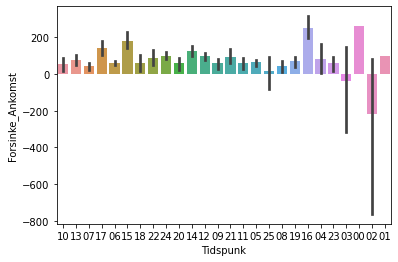

In [94]:
#Hvilke tidspunkt er det mest forsinkelser
sns.barplot(x='Tidspunk', y='Forsinke_Ankomst', data=df);

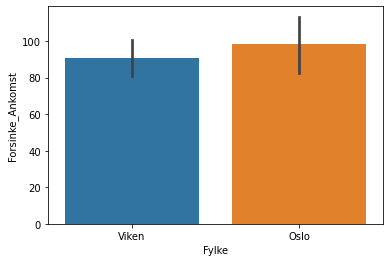

In [95]:
#Hvor forsinket er bussene i hvilke fylke
sns.barplot(x='Fylke', y='Forsinke_Ankomst', data=df);

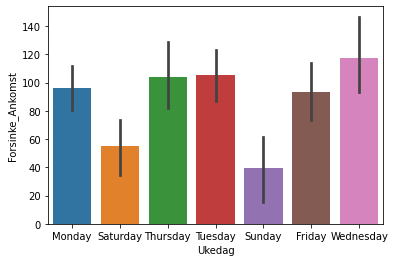

In [96]:
#Hvilke ukedag det er mest forsinkelser
sns.barplot(x='Ukedag', y='Forsinke_Ankomst', data=df); 

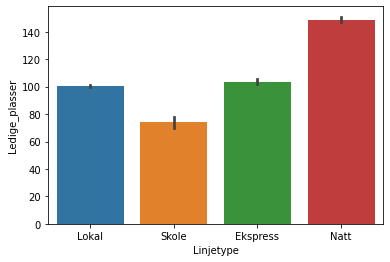

In [100]:
#Ledige plasser i bussen
sns.barplot(x='Linjetype', y='Ledige_plasser', data=df); 

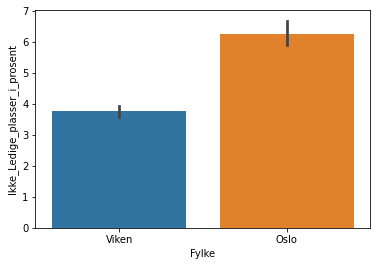

In [101]:
#Antall påstigninger i fylkene

sns.barplot(x='Fylke', y='Ikke_Ledige_plasser_i_prosent', data=df); 